# **Proyecto B:** Optimización en la Planificación de Entregas Salva Vidas con Flota Híbrida para LogistiCo
## Intregantes

* Rodrigo Paz Londoño
* Sebastián Palma Mogollón
* Miguel Santiago Castillo Hernandez 

## Descripcion de los archivos del dataset

## Carga de datos 

### Caso 1 - CVRP Base

In [2]:
import pandas as pd

clients_C1 = pd.read_csv("Caso 1 - CVRP Base/clients.csv")
depots_C1 = pd.read_csv("Caso 1 - CVRP Base/depots.csv")
vehicles_C1 = pd.read_csv("Caso 1 - CVRP Base/vehicles.csv")
parameters_C1 = pd.read_csv("Caso 1 - CVRP Base/parameters_base.csv", sep=";")

In [3]:
clients_C1.head()

,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,2,4.597954,-74.098938,13
1,2,C002,3,4.687821,-74.075571,15
2,3,C003,4,4.709494,-74.107085,12
3,4,C004,5,4.605029,-74.097280,15
4,5,C005,6,4.648464,-74.164641,20


In [4]:
depots_C1.head()

,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.153536,4.743359


In [5]:
vehicles_C1.head()

,VehicleID,StandardizedID,Capacity,Range
0,1,V001,130,170
1,2,V002,140,200
2,3,V003,120,180
3,4,V004,100,90
4,5,V005,70,100


In [6]:
parameters_C1.head()

,Parameter,Value,Unit,Description
0,fuel_price,16300.0,COP/liter,Fuel price for vehicles
1,cost_transport_km,3000.0,COP/km,Transport cost per kilometer
2,cost_maintenance_km,500.0,COP/km,Maintenance cost per kilometer
3,operational_cost_vehicle,50000.0,COP/vehicle/day,Fixed daily cost per vehicle
4,fuel_efficiency,7.9,km/L,Fuel efficiency of vehicles


### Caso 2 - Simplificado Proyecto-Específico

In [7]:
clients_C2 = pd.read_csv("Caso 2 - Simplificado Proyecto-Específico/clients.csv")
depots_C2 = pd.read_csv("Caso 2 - Simplificado Proyecto-Específico/depots.csv")
vehicles_C2 = pd.read_csv("Caso 2 - Simplificado Proyecto-Específico/vehicles.csv")
parameters_C2 = pd.read_csv("Caso 2 - Simplificado Proyecto-Específico/parameters_rural.csv")

In [8]:
clients_C2.head()

,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand,TimeWindow
0,1,C001,2,12.341057,-71.723837,25.0,13:20-13:50
1,2,C002,3,12.310993,-71.719252,9.0,13:30-14:00
2,3,C003,4,12.326781,-71.668190,18.0,10:15-10:45
3,4,C004,5,12.330562,-71.694530,22.0,13:00-13:30
4,5,C005,6,12.346781,-71.708920,13.0,14:50-15:20


In [9]:
depots_C2.head()

,DepotID,StandardizedID,LocationID,Latitude,Longitude
0,1,CD01,1,12.31846,-71.716203


In [10]:
vehicles_C2.head()

,VehicleID,StandardizedID,Type,Capacity,Range,Speed
0,1,V001,4x4,200.0,804.0,50.0
1,2,V002,drone,25.0,480.0,135.0
2,3,V003,drone,25.0,480.0,135.0


In [11]:
parameters_C2.head()

,Parameter,Value,Unit,Description
0,C_fixed_drone,30000,COP/vehicle,Fixed activation cost for drones
1,C_fixed_truck,60000,COP/vehicle,Fixed activation cost for 4x4 trucks
2,C_dist_drone,800,COP/km,Drone maintenance per km
3,C_dist_truck,3000,COP/km,Truck maintenance per km
4,C_time_drone,2000,COP/hour,Drone operator hourly cost


### Caso 3 - Avanzado Realista

In [12]:
clients_C3 = pd.read_csv("Caso 3 - Avanzado Realista/clients.csv")
depots_C3 = pd.read_csv("Caso 3 - Avanzado Realista/depots.csv")
vehicles_C3 = pd.read_csv("Caso 3 - Avanzado Realista/vehicles.csv")
parameters_C3 = pd.read_csv("Caso 3 - Avanzado Realista/parameters_rural.csv")

In [13]:
clients_C3.head()

,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand,TimeWindow
0,1,C001,2,12.341057,-71.723837,25.0,13:05-14:05
1,2,C002,3,12.310993,-71.719252,9.0,13:15-14:15
2,3,C003,4,12.326781,-71.668190,18.0,10:00-10:60
3,4,C004,5,12.330562,-71.694530,22.0,12:45-13:45
4,5,C005,6,12.346781,-71.708920,13.0,14:35-15:35


In [14]:
depots_C3.head()

,DepotID,StandardizedID,LocationID,Latitude,Longitude
0,1,CD01,1,12.31846,-71.716203


In [15]:
vehicles_C3.head()

,VehicleID,StandardizedID,Type,Capacity,Range,Speed
0,1,V001,4x4,200.0,804.0,50.0
1,2,V002,drone,25.0,480.0,135.0
2,3,V003,drone,25.0,480.0,135.0


In [16]:
parameters_C3.head()

,Parameter,Value,Unit,Description
0,C_fixed_drone,30000,COP/vehicle,Fixed activation cost for drones
1,C_fixed_truck,60000,COP/vehicle,Fixed activation cost for 4x4 trucks
2,C_dist_drone,800,COP/km,Drone maintenance per km
3,C_dist_truck,3000,COP/km,Truck maintenance per km
4,C_time_drone,2000,COP/hour,Drone operator hourly cost


## Procesamiento

### Caso 1 - CVRP Base

#### Validaciones de integridad de los datos

In [17]:
# Funciones para validar cordenadas

def validar_latitud(latitud): 
    if -90 <= latitud <= 90:
        return True
    return False

def validar_longitud(longitud): 
    if -180 <= longitud <= 180:
        return True
    return False

# Verificaciones Clientes

print("\n===== VALIDACIONES CLIENTES CASO 1 =====")

if clients_C1["Latitude"].apply(validar_latitud).all():
    print("Latitudes validas para todos los clientes")

if clients_C1["Longitude"].apply(validar_longitud).all():
    print("Longitudes validas para todos los clientes")

if (clients_C1["Demand"] >= 0).all():
    print("Todas las demandas de los clientes son mayores a 0")

if not clients_C1["StandardizedID"].duplicated().any():
    print("No hay clientes con ID repetidos")

# Verificaciones Depositos

print("\n===== VALIDACIONES DEPOSITOS CASO 1 =====")

if depots_C1["Latitude"].apply(validar_latitud).all():
    print("Latitudes validas para todos los depositos")

if depots_C1["Longitude"].apply(validar_longitud).all():
    print("Longitudes validas para todos los depositos")

if not depots_C1["StandardizedID"].duplicated().any():
    print("No hay depositos con ID repetidos")

# Verificaciones Vehiculos

print("\n===== VALIDACIONES VEHICULOS CASO 1 =====")

if (vehicles_C1["Capacity"] > 0).any():
    print("Todas las capacidades de los vehiculos no son negativas")

if (vehicles_C1["Range"] > 0).any():
    print("Todas los rangos de los vehiculos no son negativas")

if not vehicles_C1["StandardizedID"].duplicated().any():
    print("No hay vehiculos con ID repetidos")


===== VALIDACIONES CLIENTES CASO 1 =====
Latitudes validas para todos los clientes
Longitudes validas para todos los clientes
Todas las demandas de los clientes son mayores a 0
No hay clientes con ID repetidos

===== VALIDACIONES DEPOSITOS CASO 1 =====
Latitudes validas para todos los depositos
Longitudes validas para todos los depositos
No hay depositos con ID repetidos

===== VALIDACIONES VEHICULOS CASO 1 =====
Todas las capacidades de los vehiculos no son negativas
Todas los rangos de los vehiculos no son negativas
No hay vehiculos con ID repetidos


#### Matrices de distancias y costos

In [18]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Funcion para calcular distancias

def funcion_haversine(Latitud_A, Longitud_A, Latitud_B, Longitud_B):
    Radio = 6371 
    Latitud_A, Longitud_A, Latitud_B, Longitud_B = map(radians, [Latitud_A, Longitud_A, Latitud_B, Longitud_B])
    Distancia_latitud = Latitud_A - Latitud_B
    Distancia_longitud = Longitud_A - Longitud_B
    Raiz = sqrt((sin(Distancia_latitud/2)**2) + (cos(Latitud_A)*cos(Latitud_B)*(sin(Distancia_longitud/2)**2)))
    Resultado = 2 * Radio * atan2(Raiz, 1 - Raiz)
    return Resultado

# Creacion de la matriz distancia

Puntos = pd.concat([depots_C1[["StandardizedID","Latitude","Longitude"]], clients_C1[["StandardizedID","Latitude","Longitude"]]]).reset_index(drop=True)
n = len(Puntos)
Matriz_distancia = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        Matriz_distancia[i,j] = funcion_haversine(Puntos.loc[i,"Latitude"], Puntos.loc[i,"Longitude"], Puntos.loc[j,"Latitude"], Puntos.loc[j,"Longitude"])

Distacias_C1 = pd.DataFrame(Matriz_distancia, columns=Puntos["StandardizedID"], index=Puntos["StandardizedID"])
Distacias_C1.to_csv("Caso 1 - CVRP Base/distance_matrix_case1.csv", index=True)

# Creacion de la matriz de tiempos 

Velocidad_promedio = 40 
Matriz_tiempo_horas = Matriz_distancia / Velocidad_promedio 
Matriz_tiempo_minutos = Matriz_tiempo_horas * 60  
Tiempo_C1 = pd.DataFrame(Matriz_tiempo_minutos, columns=Puntos["StandardizedID"], index=Puntos["StandardizedID"])
Tiempo_C1.to_csv("Caso 1 - CVRP Base/time_matrix_case1.csv", index=True)

# Creacion de la matriz de costos

params = dict(zip(parameters_C1["Parameter"], parameters_C1["Value"]))
Pf = params["fuel_price"]                 
Ct = params["cost_transport_km"]          
Cm = params["cost_maintenance_km"]       
Co = params["operational_cost_vehicle"]   
R  = params["fuel_efficiency"]           
Salario_condutor_minuto = params["driver_salary_minute"]
Matriz_costos = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        Distancia = Matriz_distancia[i,j]
        Litros = Distancia / R
        Costo_combustible = Litros * Pf
        Costos_varios = Distancia * (Ct + Cm)
        Costo_salario = Matriz_tiempo_minutos[i,j] * Salario_condutor_minuto
        Precio_recorrido = Costo_combustible + Costos_varios + Costo_salario
        Matriz_costos[i,j] = Precio_recorrido

Costos_C1 = pd.DataFrame(Matriz_costos, columns = Puntos["StandardizedID"], index = Puntos["StandardizedID"])
Costos_C1.to_csv("Caso 1 - CVRP Base/cost_matrix_case1.csv", index=True)

In [19]:
Distacias_C1.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,...,C015,C016,C017,C018,C019,C020,C021,C022,C023,C024
StandardizedID,,,,,,,,,,,,,,,,,,,,,
CD01,0.000000,17.286825,10.628967,6.381006,16.618729,10.632248,9.738686,15.447779,10.654923,15.260083,...,16.834419,21.242656,14.550039,10.196442,12.216835,3.529100,14.313916,15.071266,4.312636,18.716717
C001,17.286825,0.000000,10.331181,12.447666,0.807915,9.203019,7.542753,13.978915,9.930116,6.412400,...,0.861627,4.726032,3.476998,7.096530,13.218733,16.747529,18.489124,3.337066,14.984307,3.792068
C002,10.628967,10.331181,0.000000,4.244684,9.522313,10.807065,5.775244,6.022198,11.526612,12.736950,...,9.537494,15.061889,9.681241,6.459504,3.502558,8.316622,8.641148,7.053344,6.643383,13.509178
C003,6.381006,12.447666,4.244684,0.000000,11.677432,9.320279,5.484354,9.515809,9.831154,12.709651,...,11.808116,16.950151,10.599694,6.216130,6.350430,4.443322,10.038049,9.620884,2.652226,14.849076
C004,16.618729,0.807915,9.522313,11.677432,0.000000,8.898098,6.869694,13.245904,9.655214,6.530131,...,0.344396,5.533000,3.264033,6.466689,12.425502,15.998823,17.701908,2.546812,14.229390,4.442109


In [20]:
Tiempo_C1.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,...,C015,C016,C017,C018,C019,C020,C021,C022,C023,C024
StandardizedID,,,,,,,,,,,,,,,,,,,,,
CD01,0.000000,25.930238,15.943451,9.571508,24.928094,15.948372,14.608029,23.171669,15.982384,22.890124,...,25.251628,31.863983,21.825058,15.294663,18.325253,5.293650,21.470873,22.606899,6.468953,28.075076
C001,25.930238,0.000000,15.496772,18.671499,1.211872,13.804529,11.314130,20.968373,14.895174,9.618599,...,1.292440,7.089047,5.215496,10.644796,19.828099,25.121293,27.733686,5.005598,22.476461,5.688101
C002,15.943451,15.496772,0.000000,6.367026,14.283469,16.210597,8.662866,9.033297,17.289919,19.105425,...,14.306240,22.592834,14.521862,9.689255,5.253837,12.474932,12.961722,10.580016,9.965074,20.263766
C003,9.571508,18.671499,6.367026,0.000000,17.516148,13.980419,8.226531,14.273713,14.746731,19.064476,...,17.712174,25.425227,15.899541,9.324195,9.525645,6.664984,15.057074,14.431327,3.978338,22.273613
C004,24.928094,1.211872,14.283469,17.516148,0.000000,13.347148,10.304542,19.868856,14.482821,9.795196,...,0.516594,8.299500,4.896050,9.700033,18.638252,23.998235,26.552862,3.820218,21.344085,6.663163


In [21]:
Costos_C1.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,...,C015,C016,C017,C018,C019,C020,C021,C022,C023,C024
StandardizedID,,,,,,,,,,,,,,,,,,,,,
CD01,0.000000,104814.969418,64446.471249,38689.862383,100764.111036,64466.363443,59048.439151,93664.306830,64603.845759,92526.249521,...,102071.899039,128800.299322,88221.048085,61823.945818,74074.167191,21397.944143,86789.365821,91381.400240,26148.743942,113484.811965
C001,104814.969418,0.000000,62640.908414,75473.761180,4898.619485,55800.539151,45733.871299,84758.163254,60209.132859,38880.213752,...,5224.289325,28655.281788,21082.030865,43028.294110,80148.958114,101545.059923,112104.849219,20233.583393,90854.143383,22992.390331
C002,64446.471249,62640.908414,0.000000,25736.732247,57736.507504,65526.324746,35016.956202,36514.309223,69889.149684,77227.773616,...,57828.553105,91324.543332,58700.136007,39165.818243,21237.012678,50426.056725,52393.753644,42766.441170,40280.729865,81910.009363
C003,38689.862383,75473.761180,25736.732247,0.000000,70803.612671,56511.519598,33253.209148,57697.072605,59609.100339,77062.249190,...,71595.986750,102773.615918,64268.978026,37690.176361,38504.474306,26941.135070,60863.565194,58334.174902,16081.202638,90034.194581
C004,100764.111036,4898.619485,57736.507504,70803.612671,0.000000,53951.717034,41652.923056,80313.705506,58542.323342,39594.052067,...,2088.170589,33548.163317,19790.768476,39209.384754,75339.371593,97005.444483,107331.732416,15442.048292,86276.864906,26933.777291


### Caso 2- Simplificado Proyecto-Específico

#### Validaciones de integridad de los datos

In [22]:
# Funciones para validar cordenadas

def validar_latitud(latitud): 
    if -90 <= latitud <= 90:
        return True
    return False

def validar_longitud(longitud): 
    if -180 <= longitud <= 180:
        return True
    return False

def validar_Tiempos(Tiempo): 
    inicio = Tiempo.split("-")[0]
    final = Tiempo.split("-")[1]
    if final <= inicio:
        return False 
    return True

# Verificaciones Clientes

print("\n===== VALIDACIONES CLIENTES CASO 2 =====")

if clients_C2["Latitude"].apply(validar_latitud).all():
    print("Latitudes validas para todos los clientes")

if clients_C2["Longitude"].apply(validar_longitud).all():
    print("Longitudes validas para todos los clientes")

if (clients_C2["Demand"] >= 0).all():
    print("Todas las demandas de los clientes son mayores a 0")

if not clients_C2["StandardizedID"].duplicated().any():
    print("No hay clientes con ID repetidos")

if  clients_C2["TimeWindow"].apply(validar_Tiempos).all():
    print("Todas las ventanas de tiempo son validas")

# Verificaciones Depositos

print("\n===== VALIDACIONES DEPOSITOS CASO 2 =====")

if depots_C2["Latitude"].apply(validar_latitud).all():
    print("Latitudes validas para todos los depositos")

if depots_C2["Longitude"].apply(validar_longitud).all():
    print("Longitudes validas para todos los depositos")

if not depots_C2["StandardizedID"].duplicated().any():
    print("No hay depositos con ID repetidos")

# Verificaciones Vehiculos

print("\n===== VALIDACIONES VEHICULOS CASO 2 =====")

if (vehicles_C2["Capacity"] > 0).any():
    print("Todas las capacidades de los vehiculos no son negativas")

if (vehicles_C2["Range"] > 0).any():
    print("Todas los rangos de los vehiculos no son negativas")

if not vehicles_C2["StandardizedID"].duplicated().any():
    print("No hay vehiculos con ID repetidos")


===== VALIDACIONES CLIENTES CASO 2 =====
Latitudes validas para todos los clientes
Longitudes validas para todos los clientes
Todas las demandas de los clientes son mayores a 0
No hay clientes con ID repetidos
Todas las ventanas de tiempo son validas

===== VALIDACIONES DEPOSITOS CASO 2 =====
Latitudes validas para todos los depositos
Longitudes validas para todos los depositos
No hay depositos con ID repetidos

===== VALIDACIONES VEHICULOS CASO 2 =====
Todas las capacidades de los vehiculos no son negativas
Todas los rangos de los vehiculos no son negativas
No hay vehiculos con ID repetidos


#### Matrices de distancias, costos y tiempo

In [23]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Funcion para calcular distancias

def funcion_haversine(Latitud_A, Longitud_A, Latitud_B, Longitud_B):
    Radio = 6371 
    Latitud_A, Longitud_A, Latitud_B, Longitud_B = map(radians, [Latitud_A, Longitud_A, Latitud_B, Longitud_B])
    Distancia_latitud = Latitud_A - Latitud_B
    Distancia_longitud = Longitud_A - Longitud_B
    Raiz = sqrt((sin(Distancia_latitud/2)**2) + (cos(Latitud_A)*cos(Latitud_B)*(sin(Distancia_longitud/2)**2)))
    Resultado = 2 * Radio * atan2(Raiz, 1 - Raiz)
    return Resultado

# Creacion de la matriz distancia

Puntos = pd.concat([depots_C2[["StandardizedID","Latitude","Longitude"]], clients_C2[["StandardizedID","Latitude","Longitude"]]]).reset_index(drop=True)
n = len(Puntos)
Matriz_distancia = np.zeros((n,n))
distanciasP = {}
for i in range(n):
    for j in range(n):
        Matriz_distancia[i,j] = funcion_haversine(Puntos.loc[i,"Latitude"], Puntos.loc[i,"Longitude"], Puntos.loc[j,"Latitude"], Puntos.loc[j,"Longitude"])
        distanciasP[(Puntos.loc[i, "StandardizedID"],Puntos.loc[j, "StandardizedID"])] = Matriz_distancia[i,j]

Distacias_C2 = pd.DataFrame(Matriz_distancia, columns=Puntos["StandardizedID"], index=Puntos["StandardizedID"])
Distacias_C2.to_csv("Caso 2 - Simplificado Proyecto-Específico/distance_matrix_case2.csv", index=True)

# Creacion de la matriz de tiempos por vehiculo

matriz_tiempo_vehiculos = []

for i, vehiculo in vehicles_C2.iterrows():
    velocidad = vehiculo["Speed"]
    tiempo_horas = Matriz_distancia / velocidad
    matriz_tiempo_vehiculos.append(tiempo_horas)
    Tiempo_C2 = pd.DataFrame(tiempo_horas, columns=Puntos["StandardizedID"], index=Puntos["StandardizedID"])
    Tiempo_C2.to_csv("Caso 2 - Simplificado Proyecto-Específico/time_matrix_case2"+ vehiculo["StandardizedID"] +".csv", index=True)

# Creacion de la matriz de costos por vehiculo 

def preciocalcular(distancia, tiempo, c_fixed, c_dist, c_time, p_combustible, gasto_conbustible):
    costosManteniento = distancia*c_dist
    costsoTiempo = tiempo*c_time
    costsoConbustible = (distancia*p_combustible)/gasto_conbustible
    return(c_fixed + costosManteniento+ costsoTiempo+costsoConbustible)

params = dict(zip(parameters_C2["Parameter"], parameters_C2["Value"]))
C_fixed_drone = float(params["C_fixed_drone"])
C_fixed_truck = float(params["C_fixed_truck"])
C_dist_drone = float(params["C_dist_drone"])
C_dist_truck = float(params["C_dist_truck"])
C_time_drone = float(params["C_time_drone"])
C_time_truck = float(params["C_time_truck"])
energy_price_drone = float(params["energy_price_drone"])
fuel_price_truck = float(params["fuel_price_truck"])
energy_consumption_drone_min = float(params["energy_consumption_drone_min"])
energy_consumption_drone_max = float(params["energy_consumption_drone_max"])
energy_consumption_drone = (energy_consumption_drone_min+energy_consumption_drone_max )/2
fuel_efficiency_truck_min = float( params["fuel_efficiency_truck_min"])
fuel_efficiency_truck_max = float( params["fuel_efficiency_truck_max"])
fuel_efficiency_truck = (fuel_efficiency_truck_min+fuel_efficiency_truck_max)/2
start_time = params["start_time"]

Matriz_costos = {}

for i, vehiculo in vehicles_C2.iterrows():
    if vehiculo["Type"] == "drone":
        costo = preciocalcular(Matriz_distancia,matriz_tiempo_vehiculos[i], C_fixed_drone,C_dist_drone,  C_time_drone,energy_price_drone,  energy_consumption_drone)
    else:
        costo = preciocalcular(Matriz_distancia,matriz_tiempo_vehiculos[i], C_fixed_truck,C_time_truck,  C_time_drone,fuel_price_truck,  fuel_efficiency_truck)
    Costos_C2 = pd.DataFrame(costo, columns = Puntos["StandardizedID"], index = Puntos["StandardizedID"])
    for i in Costos_C2.index:
        for j in Costos_C2.columns:
          Matriz_costos[(vehiculo["StandardizedID"], i, j)] = Costos_C2.loc[i, j]
    Costos_C2.to_csv("Caso 2 - Simplificado Proyecto-Específico/cost_matrix_case2" + vehiculo["StandardizedID"] +".csv", index=True)

# Cambiar el formato de las ventanas de tiempo

clientesInicio = []
clientesFinal = []
for i, cliente in clients_C2.iterrows():
    inicio = cliente["TimeWindow"].split("-")[0]
    final = cliente["TimeWindow"].split("-")[1]
    horasInicio = float(inicio.split(":")[0])
    minutosInicio = float(inicio.split(":")[1])
    horasFin = float(final.split(":")[0])
    minutosFin = float(final.split(":")[1])
    nuevaFormaInicio = horasInicio*60 + minutosInicio
    nuevaFormaFin = horasFin*60 + minutosFin
    clientesInicio.append(nuevaFormaInicio)
    clientesFinal.append(nuevaFormaFin)

clients_C2["StartWindow"] = clientesInicio
clients_C2["EndtWindow"] = clientesFinal
clients_C2.head()
depots_C2["Demand"] = 0
inicio = start_time
horasInicio = float(inicio.split(":")[0])
minutosInicio = float(inicio.split(":")[1])
nuevaFormaInicio = horasInicio*60 + minutosInicio
depots_C2["StartWindow"] = nuevaFormaInicio
depots_C2["EndtWindow"] = 1440
Puntos = pd.concat([depots_C2[["StandardizedID","Latitude","Longitude","StartWindow", "EndtWindow", "Demand"]], clients_C2[["StandardizedID","Latitude","Longitude", "StartWindow", "EndtWindow", "Demand"]]]).reset_index(drop=True)

In [24]:
Distacias_C2.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014
StandardizedID,,,,,,,,,,,,,,,
CD01,0.000000,2.646561,0.894029,5.299421,2.712365,3.247803,2.853698,2.286665,3.701786,2.164191,3.017745,4.092530,1.279438,1.612040,3.708930
C001,2.646561,0.000000,3.380789,6.252951,3.391660,1.741142,3.464162,4.764497,4.978817,4.644156,1.335163,5.771881,2.396929,1.573272,2.806894
C002,0.894029,3.380789,0.000000,5.820975,3.457484,4.136038,2.558916,1.413714,4.196895,2.047156,3.475707,4.393482,1.362232,2.502407,4.594641
C003,5.299421,6.252951,5.820975,0.000000,2.892734,4.953815,8.151343,6.512282,1.623496,4.292862,7.436570,1.888625,6.534092,4.839221,4.019204
C004,2.712365,3.391660,3.457484,2.892734,0.000000,2.387055,5.450454,4.565609,1.625388,2.867234,4.542720,2.554449,3.815073,1.946417,1.898242


In [25]:
Tiempo_C2.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014
StandardizedID,,,,,,,,,,,,,,,
CD01,0.000000,0.019604,0.006622,0.039255,0.020092,0.024058,0.021139,0.016938,0.027421,0.016031,0.022354,0.030315,0.009477,0.011941,0.027474
C001,0.019604,0.000000,0.025043,0.046318,0.025123,0.012897,0.025660,0.035293,0.036880,0.034401,0.009890,0.042755,0.017755,0.011654,0.020792
C002,0.006622,0.025043,0.000000,0.043118,0.025611,0.030637,0.018955,0.010472,0.031088,0.015164,0.025746,0.032544,0.010091,0.018536,0.034034
C003,0.039255,0.046318,0.043118,0.000000,0.021428,0.036695,0.060380,0.048239,0.012026,0.031799,0.055086,0.013990,0.048401,0.035846,0.029772
C004,0.020092,0.025123,0.025611,0.021428,0.000000,0.017682,0.040374,0.033819,0.012040,0.021239,0.033650,0.018922,0.028260,0.014418,0.014061


In [26]:
Costos_C2.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014
StandardizedID,,,,,,,,,,,,,,,
CD01,30000.000000,59733.922281,40044.350919,89538.600859,60473.224325,66488.828207,62061.082975,55690.515787,71589.289633,54314.524627,63904.139128,75979.274532,44374.393714,48111.147417,71669.552800
C001,59733.922281,30000.000000,67982.914035,100251.439890,68105.044142,49561.597726,68919.603480,83528.765428,85936.643835,82176.743936,45000.456565,94846.651830,56929.318549,47675.593474,61535.244747
C002,40044.350919,67982.914035,30000.000000,95398.220996,68844.579966,76468.085269,58749.226966,45882.971356,77151.809117,52999.643904,69049.311428,79360.449819,45304.573783,58114.354936,81620.446000
C003,89538.600859,100251.439890,95398.220996,30000.000000,62499.648471,85655.741332,121579.738855,103165.009974,48239.855741,78229.983871,113549.310623,51218.564889,103410.038591,84368.288268,75155.454483
C004,60473.224325,68105.044142,68844.579966,62499.648471,30000.000000,56818.387078,91235.444816,81294.276073,48261.113789,62213.167103,81037.118281,58699.041348,72862.067625,51867.851465,51326.610316


### Caso 3- Avanzado Realista

#### Validaciones de integridad de los datos

In [27]:
# Funciones para validar cordenadas

def validar_latitud(latitud): 
    if -90 <= latitud <= 90:
        return True
    return False

def validar_longitud(longitud): 
    if -180 <= longitud <= 180:
        return True
    return False

def validar_Tiempos(Tiempo): 
    inicio = Tiempo.split("-")[0]
    final = Tiempo.split("-")[1]
    if final <= inicio:
        return False 
    return True

# Verificaciones Clientes

print("\n===== VALIDACIONES CLIENTES CASO 3 =====")

if clients_C3["Latitude"].apply(validar_latitud).all():
    print("Latitudes validas para todos los clientes")

if clients_C3["Longitude"].apply(validar_longitud).all():
    print("Longitudes validas para todos los clientes")

if (clients_C3["Demand"] >= 0).all():
    print("Todas las demandas de los clientes son mayores a 0")

if not clients_C3["StandardizedID"].duplicated().any():
    print("No hay clientes con ID repetidos")

if  clients_C3["TimeWindow"].apply(validar_Tiempos).all():
    print("Todas las ventanas de tiempo son validas")

# Verificaciones Depositos

print("\n===== VALIDACIONES DEPOSITOS CASO 3=====")

if depots_C3["Latitude"].apply(validar_latitud).all():
    print("Latitudes validas para todos los depositos")

if depots_C3["Longitude"].apply(validar_longitud).all():
    print("Longitudes validas para todos los depositos")

if not depots_C3["StandardizedID"].duplicated().any():
    print("No hay depositos con ID repetidos")

# Verificaciones Vehiculos

print("\n===== VALIDACIONES VEHICULOS CASO 3 =====")

if (vehicles_C3["Capacity"] > 0).any():
    print("Todas las capacidades de los vehiculos no son negativas")

if (vehicles_C3["Range"] > 0).any():
    print("Todas los rangos de los vehiculos no son negativas")

if not vehicles_C3["StandardizedID"].duplicated().any():
    print("No hay vehiculos con ID repetidos")

if (clients_C3["Demand"] <= vehicles_C3["Capacity"].max()).all():
    print("Todas las demandas caben en al menos un vehiculo")


===== VALIDACIONES CLIENTES CASO 3 =====
Latitudes validas para todos los clientes
Longitudes validas para todos los clientes
Todas las demandas de los clientes son mayores a 0
No hay clientes con ID repetidos
Todas las ventanas de tiempo son validas

===== VALIDACIONES DEPOSITOS CASO 3=====
Latitudes validas para todos los depositos
Longitudes validas para todos los depositos
No hay depositos con ID repetidos

===== VALIDACIONES VEHICULOS CASO 3 =====
Todas las capacidades de los vehiculos no son negativas
Todas los rangos de los vehiculos no son negativas
No hay vehiculos con ID repetidos
Todas las demandas caben en al menos un vehiculo


#### Matrices de distancias, costos y tiempo

In [28]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Funcion para calcular distancias

def funcion_haversine(Latitud_A, Longitud_A, Latitud_B, Longitud_B):
    Radio = 6371 
    Latitud_A, Longitud_A, Latitud_B, Longitud_B = map(radians, [Latitud_A, Longitud_A, Latitud_B, Longitud_B])
    Distancia_latitud = Latitud_A - Latitud_B
    Distancia_longitud = Longitud_A - Longitud_B
    Raiz = sqrt((sin(Distancia_latitud/2)**2) + (cos(Latitud_A)*cos(Latitud_B)*(sin(Distancia_longitud/2)**2)))
    Resultado = 2 * Radio * atan2(Raiz, 1 - Raiz)
    return Resultado

# Creacion de la matriz distancia

Puntos = pd.concat([depots_C3[["StandardizedID","Latitude","Longitude"]], clients_C3[["StandardizedID","Latitude","Longitude"]]]).reset_index(drop=True)
n = len(Puntos)
Matriz_distancia = np.zeros((n,n))
distanciasP = {}
for i in range(n):
    for j in range(n):
        Matriz_distancia[i,j] = funcion_haversine(Puntos.loc[i,"Latitude"], Puntos.loc[i,"Longitude"], Puntos.loc[j,"Latitude"], Puntos.loc[j,"Longitude"])
        distanciasP[(Puntos.loc[i, "StandardizedID"],Puntos.loc[j, "StandardizedID"])] = Matriz_distancia[i,j]

Distacias_C3 = pd.DataFrame(Matriz_distancia, columns=Puntos["StandardizedID"], index=Puntos["StandardizedID"])
Distacias_C3.to_csv("Caso 3 - Avanzado Realista/distance_matrix_case3.csv")

# Creacion de la matriz de tiempos por vheiculo

matriz_tiempo_vehiculos = []

for i, vehiculo in vehicles_C2.iterrows():
    velocidad = vehiculo["Speed"]
    tiempo_horas = Matriz_distancia / velocidad
    matriz_tiempo_vehiculos.append(tiempo_horas)
    Tiempo_C3 = pd.DataFrame(tiempo_horas, columns=Puntos["StandardizedID"], index=Puntos["StandardizedID"])
    Tiempo_C3.to_csv(f"Caso 3 - Avanzado Realista/time_matrix_case3_{vehiculo['StandardizedID']}.csv")

# Creacion de la matriz de costos por vehiculo 

def preciocalcular(distancia, tiempo, c_fixed, c_dist, c_time, p_combustible, gasto_conbustible):
    costosManteniento = distancia*c_dist
    costsoTiempo = tiempo*c_time
    costsoConbustible = (distancia*p_combustible)/gasto_conbustible
    return(c_fixed + costosManteniento+ costsoTiempo+costsoConbustible)

params = dict(zip(parameters_C3["Parameter"], parameters_C3["Value"]))
C_fixed_drone = float(params["C_fixed_drone"])
C_fixed_truck = float(params["C_fixed_truck"])
C_dist_drone = float(params["C_dist_drone"])
C_dist_truck = float(params["C_dist_truck"])
C_time_drone = float(params["C_time_drone"])
C_time_truck = float(params["C_time_truck"])
energy_price_drone = float(params["energy_price_drone"])
fuel_price_truck = float(params["fuel_price_truck"])
energy_consumption_drone_min = float(params["energy_consumption_drone_min"])
energy_consumption_drone_max = float(params["energy_consumption_drone_max"])
energy_consumption_drone = (energy_consumption_drone_min+energy_consumption_drone_max )/2
fuel_efficiency_truck_min = float( params["fuel_efficiency_truck_min"])
fuel_efficiency_truck_max = float( params["fuel_efficiency_truck_max"])
fuel_efficiency_truck = (fuel_efficiency_truck_min+fuel_efficiency_truck_max)/2
start_time = params["start_time"]
resupply_allowed = params["resupply_allowed"]  

Matriz_costos = {}

for i, vehiculo in vehicles_C3.iterrows():
    if vehiculo["Type"] == "drone":
        costo = preciocalcular(Matriz_distancia,matriz_tiempo_vehiculos[i], C_fixed_drone,C_dist_drone,  C_time_drone,energy_price_drone,  energy_consumption_drone)
    else:
        costo = preciocalcular(Matriz_distancia,matriz_tiempo_vehiculos[i], C_fixed_truck,C_time_truck,  C_time_drone,fuel_price_truck,  fuel_efficiency_truck)
    Costos_C3 = pd.DataFrame(costo, columns = Puntos["StandardizedID"], index = Puntos["StandardizedID"])
    for i in Costos_C3.index:
        for j in Costos_C3.columns:
          Matriz_costos[(vehiculo["StandardizedID"], i, j)] = Costos_C3.loc[i, j]
    Costos_C3.to_csv(f"Caso 3 - Avanzado Realista/cost_matrix_case3_{vehiculo['StandardizedID']}.csv")

# Cambiar el formato de las ventanas de tiempo

clientesInicio = []
clientesFinal = []
for i, cliente in clients_C3.iterrows():
    inicio = cliente["TimeWindow"].split("-")[0]
    final = cliente["TimeWindow"].split("-")[1]
    horasInicio = float(inicio.split(":")[0])
    minutosInicio = float(inicio.split(":")[1])
    horasFin = float(final.split(":")[0])
    minutosFin = float(final.split(":")[1])
    nuevaFormaInicio = horasInicio*60 + minutosInicio
    nuevaFormaFin = horasFin*60 + minutosFin
    clientesInicio.append(nuevaFormaInicio)
    clientesFinal.append(nuevaFormaFin)

clients_C3["StartWindow"] = clientesInicio
clients_C3["EndtWindow"] = clientesFinal
clients_C3.head()
depots_C3["Demand"] = 0
inicio = start_time
horasInicio = float(inicio.split(":")[0])
minutosInicio = float(inicio.split(":")[1])
nuevaFormaInicio = horasInicio*60 + minutosInicio
depots_C3["StartWindow"] = nuevaFormaInicio
depots_C3["EndtWindow"] = 1440
Puntos = pd.concat([depots_C3[["StandardizedID","Latitude","Longitude","StartWindow", "EndtWindow", "Demand"]], clients_C3[["StandardizedID","Latitude","Longitude", "StartWindow", "EndtWindow", "Demand"]]]).reset_index(drop=True)

In [29]:
Distacias_C3.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014,C015,C016,C017
StandardizedID,,,,,,,,,,,,,,,,,,
CD01,0.000000,2.646561,0.894029,5.299421,2.712365,3.247803,2.853698,2.286665,3.701786,2.164191,3.017745,4.092530,1.279438,1.612040,3.708930,4.605359,2.164547,5.124187
C001,2.646561,0.000000,3.380789,6.252951,3.391660,1.741142,3.464162,4.764497,4.978817,4.644156,1.335163,5.771881,2.396929,1.573272,2.806894,4.070004,0.521061,3.755478
C002,0.894029,3.380789,0.000000,5.820975,3.457484,4.136038,2.558916,1.413714,4.196895,2.047156,3.475707,4.393482,1.362232,2.502407,4.594641,4.513327,2.940411,5.276541
C003,5.299421,6.252951,5.820975,0.000000,2.892734,4.953815,8.151343,6.512282,1.623496,4.292862,7.436570,1.888625,6.534092,4.839221,4.019204,9.753559,5.844341,9.896679
C004,2.712365,3.391660,3.457484,2.892734,0.000000,2.387055,5.450454,4.565609,1.625388,2.867234,4.542720,2.554449,3.815073,1.946417,1.898242,6.907823,2.959684,7.000854


In [30]:
Tiempo_C3.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014,C015,C016,C017
StandardizedID,,,,,,,,,,,,,,,,,,
CD01,0.000000,0.019604,0.006622,0.039255,0.020092,0.024058,0.021139,0.016938,0.027421,0.016031,0.022354,0.030315,0.009477,0.011941,0.027474,0.034114,0.016034,0.037957
C001,0.019604,0.000000,0.025043,0.046318,0.025123,0.012897,0.025660,0.035293,0.036880,0.034401,0.009890,0.042755,0.017755,0.011654,0.020792,0.030148,0.003860,0.027818
C002,0.006622,0.025043,0.000000,0.043118,0.025611,0.030637,0.018955,0.010472,0.031088,0.015164,0.025746,0.032544,0.010091,0.018536,0.034034,0.033432,0.021781,0.039085
C003,0.039255,0.046318,0.043118,0.000000,0.021428,0.036695,0.060380,0.048239,0.012026,0.031799,0.055086,0.013990,0.048401,0.035846,0.029772,0.072249,0.043291,0.073309
C004,0.020092,0.025123,0.025611,0.021428,0.000000,0.017682,0.040374,0.033819,0.012040,0.021239,0.033650,0.018922,0.028260,0.014418,0.014061,0.051169,0.021924,0.051858


In [31]:
Costos_C3.head()

StandardizedID,CD01,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014,C015,C016,C017
StandardizedID,,,,,,,,,,,,,,,,,,
CD01,30000.000000,59733.922281,40044.350919,89538.600859,60473.224325,66488.828207,62061.082975,55690.515787,71589.289633,54314.524627,63904.139128,75979.274532,44374.393714,48111.147417,71669.552800,81740.869964,54318.523041,87569.865017
C001,59733.922281,30000.000000,67982.914035,100251.439890,68105.044142,49561.597726,68919.603480,83528.765428,85936.643835,82176.743936,45000.456565,94846.651830,56929.318549,47675.593474,61535.244747,75726.188477,35854.080845,72192.520081
C002,40044.350919,67982.914035,30000.000000,95398.220996,68844.579966,76468.085269,58749.226966,45882.971356,77151.809117,52999.643904,69049.311428,79360.449819,45304.573783,58114.354936,81620.446000,80706.890180,63035.298256,89281.546568
C003,89538.600859,100251.439890,95398.220996,30000.000000,62499.648471,85655.741332,121579.738855,103165.009974,48239.855741,78229.983871,113549.310623,51218.564889,103410.038591,84368.288268,75155.454483,139580.517917,95660.743065,141188.457404
C004,60473.224325,68105.044142,68844.579966,62499.648471,30000.000000,56818.387078,91235.444816,81294.276073,48261.113789,62213.167103,81037.118281,58699.041348,72862.067625,51867.851465,51326.610316,107608.874274,63251.832214,108654.079525


## Caso 1 - CVRP Base

In [32]:
import numpy as np
from pyomo.environ import *
import pandas as pd

# Cargar de matrices pre-calculadas 
distance_matrix_C1 = pd.read_csv("Caso 1 - CVRP Base/distance_matrix_case1.csv", index_col=0)
cost_matrix_C1     = pd.read_csv("Caso 1 - CVRP Base/cost_matrix_case1.csv", index_col=0)
time_matrix_C1     = pd.read_csv("Caso 1 - CVRP Base/time_matrix_case1.csv", index_col=0)

# Crear modelo Pyomo
model_C1 = ConcreteModel()

# Conjuntos
locations = list(distance_matrix_C1.index)            
clients   = [loc for loc in locations if loc != "CD01"]
vehicles  = list(vehicles_C1["StandardizedID"])
model_C1.Locations = Set(initialize=locations)
model_C1.Clients   = Set(initialize=clients)
model_C1.Vehicles  = Set(initialize=vehicles)

# Parametros
demand_dict = dict(zip(clients_C1["StandardizedID"], clients_C1["Demand"]))
demand_dict["CD01"] = 0 
capacity_dict = dict(zip(vehicles_C1["StandardizedID"], vehicles_C1["Capacity"]))
range_dict    = dict(zip(vehicles_C1["StandardizedID"], vehicles_C1["Range"]))

# Matrices de distancia y costo
distance_dict = {}
cost_dict     = {}
for i in locations:
    for j in locations:
        distance_dict[(i, j)] = distance_matrix_C1.loc[i, j]
        cost_dict[(i, j)]     = cost_matrix_C1.loc[i, j]

model_C1.Demand   = Param(model_C1.Locations, initialize=demand_dict, default=0)
model_C1.Capacity = Param(model_C1.Vehicles,  initialize=capacity_dict)
model_C1.Range    = Param(model_C1.Vehicles,  initialize=range_dict)
model_C1.Distance = Param(model_C1.Locations, model_C1.Locations, initialize=distance_dict)
model_C1.Cost     = Param(model_C1.Locations, model_C1.Locations, initialize=cost_dict)

# Parametros de costos unificados
params_C1 = dict(zip(parameters_C1["Parameter"], parameters_C1["Value"]))
model_C1.C_fixed = Param(initialize=params_C1["operational_cost_vehicle"])

# Variables de decision

model_C1.x = Var(model_C1.Vehicles,
                 model_C1.Locations,
                 model_C1.Locations,
                 within=Binary)

# Vehiculo activado (w_v)
model_C1.y = Var(model_C1.Vehicles, within=Binary)

# Orden de visita
model_C1.u = Var(model_C1.Vehicles,
                 model_C1.Clients,
                 within=NonNegativeIntegers,
                 bounds=(0, len(clients)))


# Función objetivo 
def objective_rule(model):
    # Costos fijos 
    fixed_costs = sum(model.C_fixed * model.y[v] for v in model.Vehicles)
    
    # Costos variables 
    variable_costs = sum(model.Cost[i, j] * model.x[v, i, j]
                         for v in model.Vehicles
                         for i in model.Locations
                         for j in model.Locations)
    
    return fixed_costs + variable_costs

model_C1.obj = Objective(rule=objective_rule, sense=minimize)

# Restricciones 

# 1. Capacidad
def distribucion_rule(model, v):
    return sum(model.Demand[j] * model.x[v, i, j]
               for i in model.Locations
               for j in model.Clients) <= model.Capacity[v]

model_C1.distribucion = Constraint(model_C1.Vehicles, rule=distribucion_rule)

# 2. Devolucion
def start_depot_rule(model, v):
    return sum(model.x[v, "CD01", j]
               for j in model.Locations if j != "CD01") == model.y[v]

# Entra a CD01
def end_depot_rule(model, v):
    return sum(model.x[v, i, "CD01"]
               for i in model.Locations if i != "CD01") == model.y[v]

model_C1.start_depot = Constraint(model_C1.Vehicles, rule=start_depot_rule)
model_C1.end_depot   = Constraint(model_C1.Vehicles, rule=end_depot_rule)

# 3. Autonomia
def autonomia_rule(model, v):
    return sum(model.Distance[i, j] * model.x[v, i, j]
               for i in model.Locations
               for j in model.Locations) <= model.Range[v] * model.y[v]

model_C1.autonomia = Constraint(model_C1.Vehicles, rule=autonomia_rule)

# 4. TSP
def tsp_rule(model, j):
    if j != "CD01":
        return sum(model.x[v, i, j]
                   for v in model.Vehicles
                   for i in model.Locations) == 1
    return Constraint.Skip

model_C1.tsp = Constraint(model_C1.Locations, rule=tsp_rule)

# 5. Solo un camino 
N = len(clients)  

def solo_un_camino_rule(model, v, i, j):
    if i != j:
        return model.u[v, i] - model.u[v, j] + N * model.x[v, i, j] <= N - 1
    return Constraint.Skip

model_C1.solo_un_camino = Constraint(model_C1.Vehicles,
                                     model_C1.Clients,
                                     model_C1.Clients,
                                     rule=solo_un_camino_rule)

# 6. Control de flujo
def control_flujo_rule(model, v, i):
    if i == "CD01":
        return Constraint.Skip
    return (sum(model.x[v, i, j] for j in model.Locations) ==
            sum(model.x[v, k, i] for k in model.Locations))

model_C1.control_flujo = Constraint(model_C1.Vehicles,
                                    model_C1.Locations,
                                    rule=control_flujo_rule)

# 7. Big M
n = len(clients)  # número de clientes

def uso_camion_rule(model, v):
    return sum(model.x[v, i, j]
               for i in model.Locations
               for j in model.Locations) <= model.y[v] * n

model_C1.uso_camion = Constraint(model_C1.Vehicles, rule=uso_camion_rule)

# Restriccion adicional: Prohibir arcos de un nodo a sí mismo
def no_self_loop_rule(model, v, i):
    return model.x[v, i, i] == 0

model_C1.no_self_loop = Constraint(model_C1.Vehicles,
                                   model_C1.Locations,
                                   rule=no_self_loop_rule)


# Resolver 

solver_C1 = SolverFactory('gurobi')
solver_C1.options['TimeLimit'] = 60  # 10 minutos
solver_C1.options['MIPGap']   = 0.01  # Gap de 1%

results_C1 = solver_C1.solve(model_C1, tee=True)

print(f"\n{'='*60}")
print(f"Condición de terminación: {results_C1.solver.termination_condition}")
try:
    print(f"Valor objetivo: {value(model_C1.obj):.2f} COP")
except:
    print("No se pudo evaluar el valor objetivo (posible modelo infactible).")
print(f"{'='*60}")


Read LP format model from file C:\Users\usuario\AppData\Local\Temp\tmpfpolnrvx.pyomo.lp
Reading time = 0.04 seconds
x1: 4872 rows, 5200 columns, 42480 nonzeros
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  60
MIPGap  0.01

Academic license 2741129 - for non-commercial use only - registered to r.___@uniandes.edu.co
Optimize a model with 4872 rows, 5200 columns and 42480 nonzeros (Min)
Model fingerprint: 0x9a1ac21b
Model has 4808 linear objective coefficients
Variable types: 0 continuous, 5200 integer (5008 binary)
Coefficient statistics:
  Matrix range     [3e-01, 2e+02]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 1e+02]
Presolve remo

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

st = results_C1.solver.status
tc = results_C1.solver.termination_condition

print(f"Estado: {st}")
print(f"Terminación: {tc}")

if tc in [TerminationCondition.infeasible,
          TerminationCondition.unbounded,
          TerminationCondition.infeasibleOrUnbounded]:
    print("No se encontró solución factible")
else:
    if tc == TerminationCondition.optimal and st == SolverStatus.ok:
        print("Solución Óptima encontrada.")
    elif tc == TerminationCondition.maxTimeLimit:
        print("Solución factible encontrada (mejor solución antes del tiempo límite).")
    else:
        print("Solución factible encontrada con condición de terminación:", tc)
    try:
        print(f"Valor objetivo: {value(model_C1.obj):.2f} COP")
    except:
        print("No se pudo evaluar el valor objetivo.")

# Extraer rutas
rutas_solucion = []
vehiculos_usados = []

for v in model_C1.Vehicles:
    if value(model_C1.y[v]) > 0.5:  # Vehiculo usado
        vehiculos_usados.append(v)
        # Construir la ruta 
        ruta = []
        actual = "CD01"
        ruta.append(actual)
        visitados = set([actual])
        
        # Buscar siguiente nodo desde CD01
        siguiente = None
        for j in model_C1.Locations:
            if j != actual and value(model_C1.x[v, actual, j]) > 0.5:
                siguiente = j
                break
        
        # Seguir la ruta hasta volver al CD
        max_iteraciones = len(model_C1.Locations) 
        iteracion = 0
        while siguiente and siguiente != "CD01" and iteracion < max_iteraciones:
            if siguiente in visitados:
                break  
            ruta.append(siguiente)
            visitados.add(siguiente)
            actual = siguiente
            siguiente = None
            for j in model_C1.Locations:
                if j != actual and value(model_C1.x[v, actual, j]) > 0.5:
                    siguiente = j
                    break
            iteracion += 1
        
        if len(ruta) > 1:
            ruta.append("CD01")
            rutas_solucion.append((v, ruta))

print(f"\nVehículos utilizados: {len(vehiculos_usados)}")
for v, ruta in rutas_solucion:
    print(f"  {v}: {' -> '.join(ruta)}")

# Metricas
resultados_verificacion = []

for v, ruta in rutas_solucion:

    vehicle_id = v
    vehicle_type = "Truck" 
    
    # Calcular demanda atendida
    clients_served = [nodo for nodo in ruta if nodo != "CD01"]
    demand_satisfied = sum(demand_dict[c] for c in clients_served)
    
    # Calcular distancia total
    total_distance = 0
    for i in range(len(ruta) - 1):
        total_distance += distance_dict[(ruta[i], ruta[i+1])]
    
    # Calcular tiempo total
    total_time_minutes = 0
    for i in range(len(ruta) - 1):
        total_time_minutes += time_matrix_C1.loc[ruta[i], ruta[i+1]]
    
    # Calcular costo
    total_cost = 0
    # Costo fijo
    if value(model_C1.y[v]) > 0.5:
        total_cost += value(model_C1.C_fixed)
    # Costos variables 
    for i in range(len(ruta) - 1):
        total_cost += cost_dict[(ruta[i], ruta[i+1])]
    
    # Formatear ruta 
    route_sequence = " - ".join(ruta)
    
    # Formatear clientes 
    clients_served_str = ", ".join(clients_served)
    
    # Formatear demanda satisfecha por cliente
    demand_satisfied_list = [f"{c}:{demand_dict[c]}" for c in clients_served]
    demand_satisfied_str = ", ".join(demand_satisfied_list)
    
    # Formatear tiempo total (HH:MM)
    horas = int(total_time_minutes // 60)
    minutos = int(total_time_minutes % 60)
    total_time_str = f"{horas:02d}:{minutos:02d}"
    
    resultados_verificacion.append({
        "VehicleId": vehicle_id,
        "VehicleType": vehicle_type,
        "InitialLoad": demand_satisfied,  
        "RouteSequence": route_sequence,
        "ClientsServed": clients_served_str,
        "DemandSatisfied": demand_satisfied_str,
        "TotalDistance": round(total_distance, 2),
        "TotalTime": total_time_str,
        "Cost": round(total_cost, 2)
    })

df_verificacion = pd.DataFrame(resultados_verificacion)
df_verificacion.to_csv("verificacion_caso1.csv", index=False)

print(f"\nResumen:")
print(f"  Total vehículos usados: {len(vehiculos_usados)}")
if results_C1.solver.status == SolverStatus.ok:
    print(f"  Costo total: {value(model_C1.obj):.2f} COP")
print(f"\n{df_verificacion.to_string(index=False)}")

Estado: aborted
Terminación: maxTimeLimit
Solución factible encontrada (mejor solución antes del tiempo límite).
Valor objetivo: 910280.81 COP

Vehículos utilizados: 3
  V001: CD01 -> C020 -> C012 -> C021 -> C007 -> C019 -> C002 -> C003 -> C023 -> C014 -> CD01
  V002: CD01 -> C024 -> C016 -> C010 -> C001 -> C004 -> C015 -> C022 -> C013 -> C006 -> CD01
  V008: CD01 -> C005 -> C008 -> C011 -> C009 -> C017 -> C018 -> CD01

Resumen:
  Total vehículos usados: 3

VehicleId VehicleType  InitialLoad                                                              RouteSequence                                        ClientsServed                                                                 DemandSatisfied  TotalDistance TotalTime      Cost
     V001       Truck          126 CD01 - C020 - C012 - C021 - C007 - C019 - C002 - C003 - C023 - C014 - CD01 C020, C012, C021, C007, C019, C002, C003, C023, C014 C020:15, C012:12, C021:14, C007:17, C019:11, C002:15, C003:12, C023:15, C014:15          38.59   

### Gráficas

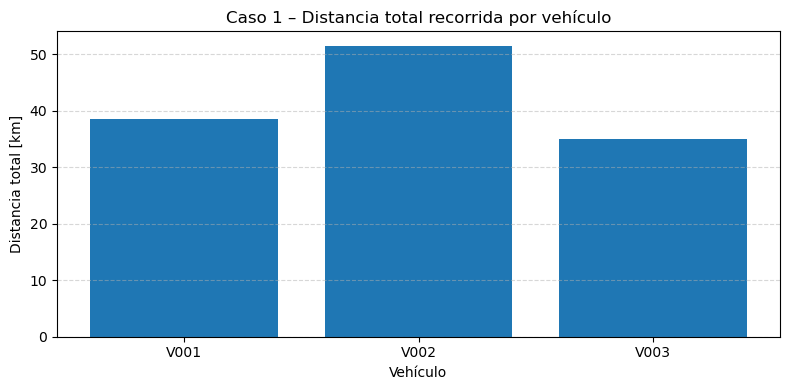

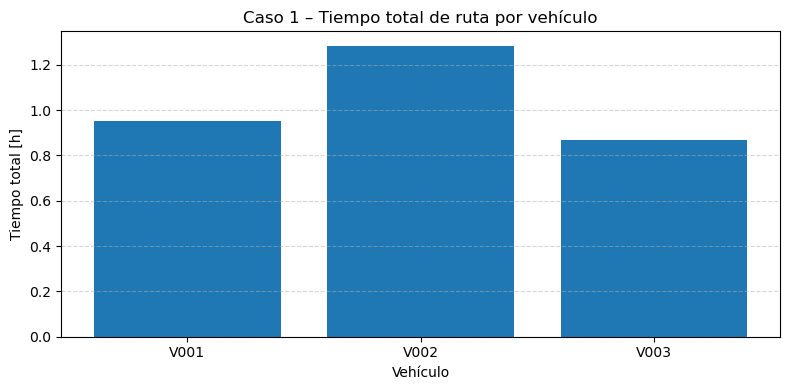

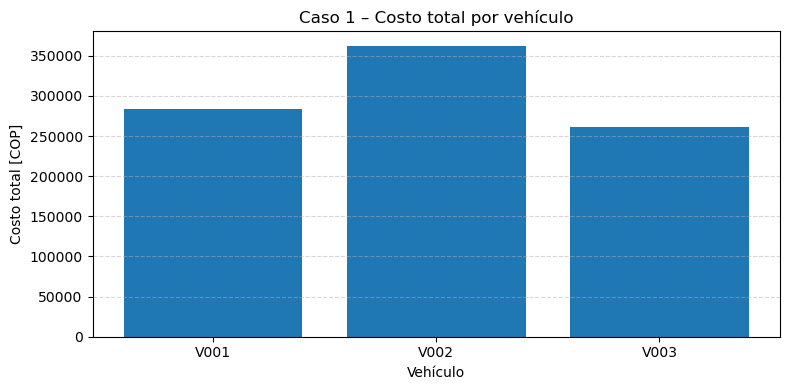

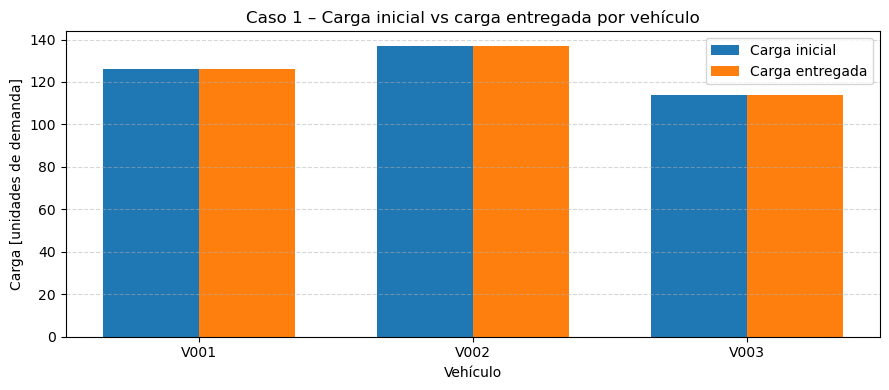

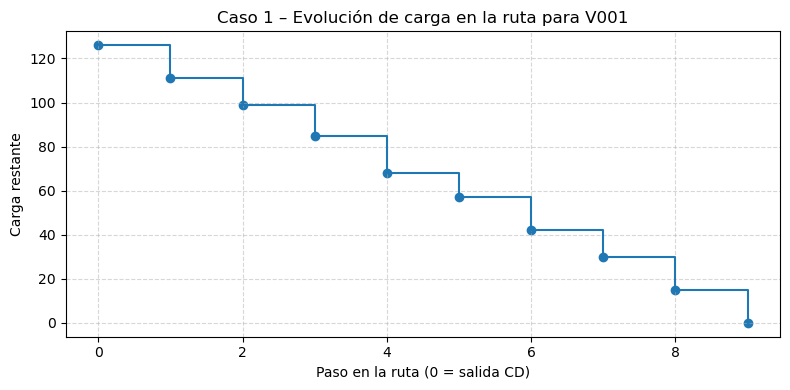

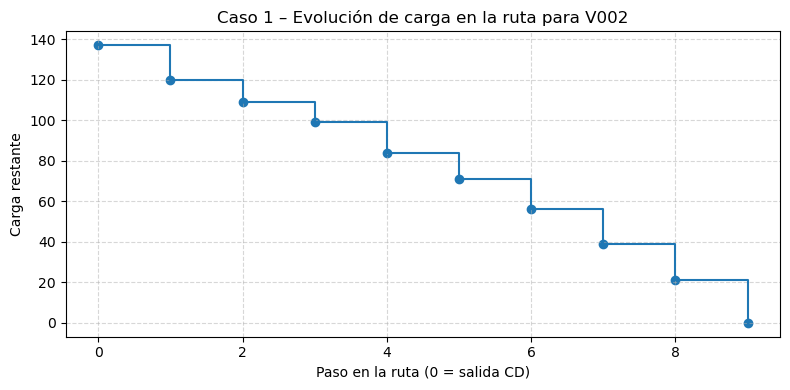

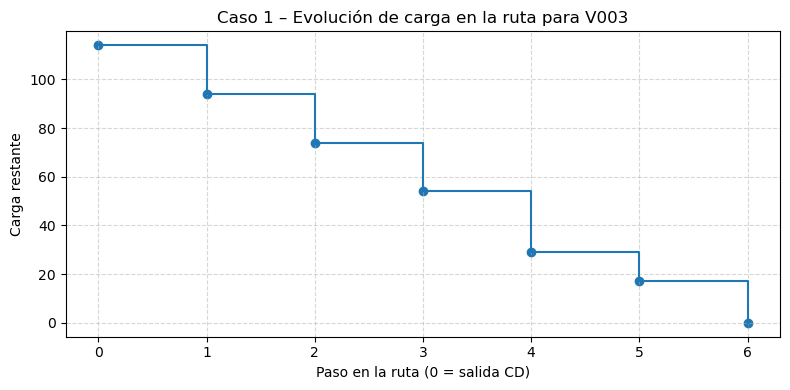

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# ==========================
# Cargar archivo de verificación Caso 1
# ==========================
verif_c1 = pd.read_csv("verificacion_caso1.csv")

# Aseguramos tipos útiles
verif_c1["VehicleId"] = verif_c1["VehicleId"].astype(str)

# Convertir TotalTime "HH:MM" -> horas (float)
def time_to_hours(t):
    if pd.isna(t):
        return 0.0
    t = str(t)
    h, m = t.split(":")
    return int(h) + int(m) / 60.0

verif_c1["TotalTimeHours"] = verif_c1["TotalTime"].apply(time_to_hours)

# ==========================
# Función para sumar demandas de la cadena "C020:15, C012:12, ..."
# ==========================
def sum_demands(demand_str):
    if pd.isna(demand_str) or str(demand_str).strip() == "":
        return 0.0
    parts = str(demand_str).split(",")
    total = 0.0
    for p in parts:
        p = p.strip()      # "C020:15"
        if ":" in p:
            _, val = p.split(":")
            total += float(val)
    return total

verif_c1["DeliveredLoad"] = verif_c1["DemandSatisfied"].apply(sum_demands)

# ==========================
# 1. Distancia total por vehículo
# ==========================
plt.figure(figsize=(8, 4))
plt.bar(verif_c1["VehicleId"], verif_c1["TotalDistance"])
plt.xlabel("Vehículo")
plt.ylabel("Distancia total [km]")
plt.title("Caso 1 – Distancia total recorrida por vehículo")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ==========================
# 2. Tiempo total por vehículo (en horas)
# ==========================
plt.figure(figsize=(8, 4))
plt.bar(verif_c1["VehicleId"], verif_c1["TotalTimeHours"])
plt.xlabel("Vehículo")
plt.ylabel("Tiempo total [h]")
plt.title("Caso 1 – Tiempo total de ruta por vehículo")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ==========================
# 3. Costo total por vehículo
# ==========================
plt.figure(figsize=(8, 4))
plt.bar(verif_c1["VehicleId"], verif_c1["Cost"])
plt.xlabel("Vehículo")
plt.ylabel("Costo total [COP]")
plt.title("Caso 1 – Costo total por vehículo")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ==========================
# 4. Carga inicial vs carga entregada por vehículo
# ==========================
x = range(len(verif_c1))
width = 0.35

plt.figure(figsize=(9, 4))
plt.bar([i - width/2 for i in x], verif_c1["InitialLoad"],
        width=width, label="Carga inicial")
plt.bar([i + width/2 for i in x], verif_c1["DeliveredLoad"],
        width=width, label="Carga entregada")

plt.xticks(list(x), verif_c1["VehicleId"])
plt.xlabel("Vehículo")
plt.ylabel("Carga [unidades de demanda]")
plt.title("Caso 1 – Carga inicial vs carga entregada por vehículo")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ==========================
# 5. Evolución de carga a lo largo de la ruta (por vehículo)
# ==========================
for _, row in verif_c1.iterrows():
    veh_id      = row["VehicleId"]
    init_load   = row["InitialLoad"]
    demand_str  = row["DemandSatisfied"]
    route_str   = row["RouteSequence"]

    if pd.isna(demand_str) or pd.isna(route_str):
        continue

    # Lista de demandas por orden de visita
    parts = str(demand_str).split(",")
    demands = []
    for p in parts:
        p = p.strip()           # "C020:15"
        if ":" in p:
            _, val = p.split(":")
            demands.append(float(val))

    # Secuencia de nodos
    nodes = [n.strip() for n in str(route_str).split("-")]

    # Quitamos CD01 inicial y final para alinear con las demandas
    inner_nodes = [n for n in nodes if n != "CD01"]

    # Carga restante: empieza en init_load y va restando cada demanda
    remaining_load = [init_load]
    current = init_load
    for d in demands:
        current -= d
        remaining_load.append(current)

    steps = list(range(len(remaining_load)))  # 0 = salida depósito

    plt.figure(figsize=(8, 4))
    plt.step(steps, remaining_load, where="post")
    plt.scatter(steps, remaining_load)
    plt.xlabel("Paso en la ruta (0 = salida CD)")
    plt.ylabel("Carga restante")
    plt.title(f"Caso 1 – Evolución de carga en la ruta para {veh_id}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()



## Caso 2- Simplificado Proyecto-Específico

In [ ]:
import numpy as np
from pyomo.environ import *
import pandas as pd



# Crear modelo Pyomo
model_C2 = ConcreteModel()
Lugares = Puntos["StandardizedID"]
# Conjuntos
locations = Lugares.copy()           
clients   = [loc for loc in locations if loc != "CD01"]
vehicles  = list(vehicles_C2["StandardizedID"])
model_C2.Locations = Set(initialize=locations)
model_C2.Clients   = Set(initialize=clients)
model_C2.Vehicles  = Set(initialize=vehicles)

# Parametros
demand_dict = dict(zip(clients_C2["StandardizedID"], clients_C2["Demand"]))
demand_dict["CD01"] = 0 
capacity_dict = dict(zip(vehicles_C2["StandardizedID"], vehicles_C2["Capacity"]))
range_dict    = dict(zip(vehicles_C2["StandardizedID"], vehicles_C2["Range"]))
inicioTiempo =  dict(zip(Puntos['StandardizedID'].tolist(), Puntos['StartWindow'].tolist())) 
finTiempo =  dict(zip(Puntos['StandardizedID'].tolist(), Puntos['EndtWindow'].tolist())) 

# Matrices de distancia y costo
distance_dict = distanciasP
cost_dict   = Matriz_costos


model_C2.HI_i= Param(model.Lugares, initialize = inicioTiempo)
model_C2.HF_i= Param(model.Lugares, initialize = finTiempo)
model_C2.Demand   = Param(model_C2.Locations, initialize=demand_dict, default=0)
model_C2.Capacity = Param(model_C2.Vehicles,  initialize=capacity_dict)
model_C2.Range    = Param(model_C2.Vehicles,  initialize=range_dict)
model_C2.Distance = Param(model_C2.Locations, model_C2.Locations, initialize=distance_dict)
model_C2.Cost     = Param(model_C2.Vehicles, model_C2.Locations, model_C2.Locations, initialize=cost_dict)



# Variables de decision

model_C2.x = Var(model_C2.Vehicles,
                 model_C2.Locations,
                 model_C2.Locations,
                 within=Binary)

# Vehiculo activado (w_v)
model_C2.y = Var(model_C2.Vehicles, within=Binary)

# Orden de visita
model_C2.u = Var(model_C2.Vehicles,
                 model_C2.Clients,
                 within=NonNegativeIntegers,
                 bounds=(0, len(clients)))

model_C2.h = Var(model.Vehiculos, model.Lugares,model.Lugares, bounds =(1 , 1440),  within=Integers)

# Función objetivo 
def objective_rule(model):
    variable_costs = sum(model.Cost[v, i, j] * model.x[v, i, j]
                         for v in model.Vehicles
                         for i in model.Locations
                         for j in model.Locations)
    
    return  variable_costs

model_C2.obj = Objective(rule=objective_rule, sense=minimize)

# Restricciones 

# 1. Capacidad
def distribucion_rule(model, v):
    return sum(model.Demand[j] * model.x[v, i, j]
               for i in model.Locations
               for j in model.Clients) <= model.Capacity[v]

model_C2.distribucion = Constraint(model_C2.Vehicles, rule=distribucion_rule)

# 2. Devolucion
def start_depot_rule(model, v):
    return sum(model.x[v, "CD01", j]
               for j in model.Locations if j != "CD01") == model.y[v]

# Entra a CD01
def end_depot_rule(model, v):
    return sum(model.x[v, i, "CD01"]
               for i in model.Locations if i != "CD01") == model.y[v]

model_C2.start_depot = Constraint(model_C2.Vehicles, rule=start_depot_rule)
model_C2.end_depot   = Constraint(model_C2.Vehicles, rule=end_depot_rule)

# 3. Autonomia
def autonomia_rule(model, v):
    return sum(model.Distance[i, j] * model.x[v, i, j]
               for i in model.Locations
               for j in model.Locations) <= model.Range[v] * model.y[v]

model_C2.autonomia = Constraint(model_C2.Vehicles, rule=autonomia_rule)

# 4. TSP
def tsp_rule(model, j):
    if j != "CD01":
        return sum(model.x[v, i, j]
                   for v in model.Vehicles
                   for i in model.Locations) == 1
    return Constraint.Skip

model_C2.tsp = Constraint(model_C2.Locations, rule=tsp_rule)

# 5. Solo un camino 
N = len(clients)  

def solo_un_camino_rule(model, v, i, j):
    if i != j:
        return model.u[v, i] - model.u[v, j] + N * model.x[v, i, j] <= N - 1
    return Constraint.Skip

model_C2.solo_un_camino = Constraint(model_C2.Vehicles,
                                     model_C2.Clients,
                                     model_C2.Clients,
                                     rule=solo_un_camino_rule)

# 6. Control de flujo
def control_flujo_rule(model, v, i):
    if i == "CD01":
        return Constraint.Skip
    return (sum(model.x[v, i, j] for j in model.Locations) ==
            sum(model.x[v, k, i] for k in model.Locations))

model_C2.control_flujo = Constraint(model_C2.Vehicles,
                                    model_C2.Locations,
                                    rule=control_flujo_rule)

# 7. Big M
n = len(clients)  # número de clientes

def uso_camion_rule(model, v):
    return sum(model.x[v, i, j]
               for i in model.Locations
               for j in model.Locations) <= model.y[v] * n

model_C2.uso_camion = Constraint(model_C2.Vehicles, rule=uso_camion_rule)

# Restriccion adicional: Prohibir arcos de un nodo a sí mismo
def no_self_loop_rule(model, v, i):
    return model.x[v, i, i] == 0

model_C2.no_self_loop = Constraint(model_C2.Vehicles,
                                   model_C2.Locations,
                                   rule=no_self_loop_rule)

# Tiempo
def restriccion_tiempo_Inico(model, v, i , j):
    return (model.h[v, i,j] >= model.HI_i[i])
model_C2.startWindow = Constraint(model_C2.Vehicles, model_C2.Locations, model_C2.Locations, rule = restriccion_tiempo_Inico)

def restriccion_tiempo_Fin(model, v, i , j):
    return (model.h[v, i,j] <= model.HF_i[i])
model_C2.endWindow = Constraint(model_C2.Vehicles, model_C2.Locations, model_C2.Locations, rule = restriccion_tiempo_Fin)

# Resolver 

solver_C2 = SolverFactory('gurobi')


results_C2 = solver_C2.solve(model_C2, tee=True)

print(f"\n{'='*60}")
print(f"Condición de terminación: {results_C2.solver.termination_condition}")
try:
    print(f"Valor objetivo: {value(model_C2.obj):.2f} COP")
except:
    print("No se pudo evaluar el valor objetivo (posible modelo infactible).")
print(f"{'='*60}")


Read LP format model from file C:\Users\msant\AppData\Local\Temp\tmptvwk4ijc.pyomo.lp
Reading time = 0.01 seconds
x1: 2897 rows, 1998 columns, 9858 nonzeros
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: AMD Ryzen 5 8640HS w/ Radeon 760M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  60

Optimize a model with 2897 rows, 1998 columns and 9858 nonzeros
Model fingerprint: 0x150644a0
Variable types: 0 continuous, 1998 integer (975 binary)
Coefficient statistics:
  Matrix range     [5e-01, 8e+02]
  Objective range  [3e+04, 2e+05]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 1e+03]
Presolve removed 1999 rows and 1210 columns
Presolve time: 0.06s
Presolved: 898 rows, 788 columns, 5994 nonzeros
Variable types: 0 continuous, 788 integer (737 binary)

Root relaxation: objective 1.176

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

st = results_C2.solver.status
tc = results_C2.solver.termination_condition

print(f"Estado: {st}")
print(f"Terminación: {tc}")

if tc in [TerminationCondition.infeasible,
          TerminationCondition.unbounded,
          TerminationCondition.infeasibleOrUnbounded]:
    print("No se encontró solución factible")
else:
    if tc == TerminationCondition.optimal and st == SolverStatus.ok:
        print("Solución Óptima encontrada.")
    elif tc == TerminationCondition.maxTimeLimit:
        print("Solución factible encontrada (mejor solución antes del tiempo límite).")
    else:
        print("Solución factible encontrada con condición de terminación:", tc)
    try:
        print(f"Valor objetivo: {value(model_C2.obj):.2f} COP")
    except:
        print("No se pudo evaluar el valor objetivo.")

# Extraer rutas
rutas_solucion = []
vehiculos_usados = []

for v in model_C2.Vehicles:
    if value(model_C2.y[v]) > 0.5:  # Vehiculo usado
        vehiculos_usados.append(v)
        # Construir la ruta 
        ruta = []
        actual = "CD01"
        ruta.append(actual)
        visitados = set([actual])
        
        # Buscar siguiente nodo desde CD01
        siguiente = None
        for j in model_C2.Locations:
            if j != actual and value(model_C2.x[v, actual, j]) > 0.5:
                siguiente = j
                break
        
        # Seguir la ruta hasta volver al CD
        max_iteraciones = len(model_C2.Locations) 
        iteracion = 0
        while siguiente and siguiente != "CD01" and iteracion < max_iteraciones:
            if siguiente in visitados:
                break  
            ruta.append(siguiente)
            visitados.add(siguiente)
            actual = siguiente
            siguiente = None
            for j in model_C2.Locations:
                if j != actual and value(model_C2.x[v, actual, j]) > 0.5:
                    siguiente = j
                    break
            iteracion += 1
        
        if len(ruta) > 1:
            ruta.append("CD01")
            rutas_solucion.append((v, ruta))

print(f"\nVehículos utilizados: {len(vehiculos_usados)}")
for v, ruta in rutas_solucion:
    print(f"  {v}: {' -> '.join(ruta)}")



Estado: ok
Terminación: optimal
Solución Óptima encontrada.
Valor objetivo: 1360081.64 COP

Vehículos utilizados: 3
  V001: CD01 -> C011 -> C003 -> C008 -> C004 -> C014 -> C005 -> C001 -> C012 -> CD01
  V002: CD01 -> C006 -> C015 -> C017 -> C010 -> C016 -> C013 -> CD01
  V003: CD01 -> C002 -> C007 -> C009 -> CD01


## Caso 3- Avanzado Realista

## Análisis de resultados

## Análisis de sensibilidad